In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,ambience creacions,sector 22,3.20,11500.0,2783.0,Super Built up area 2781(258.36 sq.m.),3,4,3+,not available,2.0,North-East,Within 6 months,"['Moulsari Avenue', 'Ambience Mall', 'Old Delhi Gurgaon Road', 'Gurgaon - Delhi Expy', 'Rotary Public School', 'The NorthCap University', 'Manipal Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Candor Techspace', 'Hyatt Place Gurgaon Udyog Vihar', 'Fun N Food WaterPark', 'Hamoni Golf Camp', 'Tau DeviLal Sports Complex']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']"
1,flat,m3m woodshire,sector 107,1.80,7623.0,2361.0,Super Built up area 2361(219.34 sq.m.)Carpet area: 1384 sq.ft. (128.58 sq.m.),3,4,3+,servant room,2.0,NaN,1 to 5 Year Old,"['Signum 107', 'Nora Solomon Medicenter', 'Indira Gandhi International Airport', 'The Shikshiyan School', 'Najafgarh Jheel Bird Sanctuary', 'Skylark Cricket Academy']",[],"['Security / Fire Alarm', 'Power Back-up', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
2,flat,palam vihar society,sector 2,0.40,8602.0,465.0,Super Built up area 465(43.2 sq.m.)Built Up area: 450 sq.ft. (41.81 sq.m.)Carpet area: 425 sq.ft. (39.48 sq.m.),1,1,1,not available,5.0,North,5 to 10 Year Old,"['Palam Vihar Vyapar kendra', 'Palam triangle', 'HUDA Sector 23 Market', 'Ram Mandir', 'Kalyan Hospital Gurgaon', 'Metro Hospital and Heart Institute Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Chirag Hospital Pvt. Ltd', 'R K Hospital Gurgaon', 'Jiya Clinic', 'Dr. Mittal Clinic', ""Dr. Anurag's Child Care Clinic"", 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Axis bank', 'Punjab national bank', 'Big Cinemas', ""McDonald's"", 'Cafe Coffee Day', 'Moti Mahal', 'Pizza Hut', 'Pind Baluchi', ""Domino's Pizza"", 'Om Sweets', 'Chiranjiv Bharati School', 'Masti ki Pathshala Teach India', 'THE NORTHCAP UNIVERSITY', 'Swiss Cottage school', 'Palam vihar railway station']","['1 Water Purifier', '1 Fan', '1 Fridge', '1 Exhaust Fan', '1 Geyser', '1 Stove', '2 Light', '1 AC', '1 Curtains', '1 Modular Kitchen', '1 TV', '1 Chimney', '1 Bed', '1 Wardrobe', 'No Dining Table', 'No Microwave', 'No Sofa', 'No Washing Machine']","['Centrally Air Conditioned', 'Lift(s)', 'Park', 'Maintenance Staff', 'Visitor Parking', 'Security Personnel']"
3,flat,smart world gems,sector 89,1.20,12526.0,958.0,Carpet area: 958 (89 sq.m.),3,3,3,"pooja room,store room",3.0,East,Oct-23,"['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', 'KMP Expressway', 'RPS International School', 'Genesis Hospital Sector 84', 'Gurgaon Railway Station', 'Vatika Business Park Sector 49', 'Holiday Inn Gurugram Sector 90', 'De Adventure Amusement Park', 'National Tennis Academy Sector 98', 'IMT Manesar']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi conn

In [5]:
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

### 1). areaWithType

In [6]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
3022,1.80,1900.0,Built Up area: 1900 (176.52 sq.m.)
3461,1.38,1720.0,Super Built up area 1720(159.79 sq.m.)Built Up area: 1350 sq.ft. (125.42 sq.m.)Carpet area: 1150 sq.ft. (106.84 sq.m.)
2611,0.85,1422.0,Super Built up area 1430(132.85 sq.m.)
89,24.00,400.0,Plot area 400(37.16 sq.m.)
1806,2.00,1685.0,Super Built up area 2408(223.71 sq.m.)Carpet area: 1685 sq.ft. (156.54 sq.m.)


In [7]:
#this function extracts the super built up area 
def get_super_built_up_area(text):
    match=re.search(r'Super Built up area (\d+\.?\d*)',text)
    if match:
        return float(match.group(1))
    return None


In [8]:
#This function extracts the Built up area or Carpet area
def get_area(text, area_type):
    match=re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
#This function checks if the area is provided in sq.m. and converts it to sqft if needed 
def convert_to_sqft(text,area_value):
    if area_value is None:
        return None
    match=re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value),text)
    if match:
        sq_m_value=float(match.group(1))
        return sq_m_value * 10.7639 #conversion factor from sq.m. to sqft
    return area_value

In [10]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [11]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)


,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
311,5.75,house,3500.0,Plot area 272(25.27 sq.m.)Built Up area: 4800 sq.ft. (445.93 sq.m.)Carpet area: 3500 sq.ft. (325.16 sq.m.),NaN,4800.0,3500.0
337,4.20,flat,2125.0,Super Built up area 2150(199.74 sq.m.),2150.0,NaN,NaN
2993,1.75,flat,1900.0,Super Built up area 1900(176.52 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1240 sq.ft. (115.2 sq.m.),1900.0,1600.0,1240.0
1361,0.92,flat,1365.0,Super Built up area 1365(126.81 sq.m.),1365.0,NaN,NaN
2389,1.80,flat,2290.0,Carpet area: 2290 (212.75 sq.m.),NaN,NaN,2290.0


In [12]:
df.duplicated().sum()

119

In [13]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [14]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
8,8.75,house,3600.0,Plot area 400(334.45 sq.m.),NaN,NaN,NaN
12,0.59,house,585.0,Plot area 585(54.35 sq.m.),NaN,NaN,NaN
30,4.35,house,5481.0,Plot area 5480(509.11 sq.m.),NaN,NaN,NaN
32,2.40,house,900.0,Plot area 100(83.61 sq.m.),NaN,NaN,NaN
37,4.60,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN


In [15]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    12
price_per_sqft           12
area                     12
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1102
agePossession             1
nearbyLocations         177
furnishDetails          979
features                634
super_built_up_area    1882
built_up_area          2610
carpet_area            1853
dtype: int64

In [16]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [17]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
8,8.75,house,3600.0,Plot area 400(334.45 sq.m.),NaN,NaN,NaN
12,0.59,house,585.0,Plot area 585(54.35 sq.m.),NaN,NaN,NaN
30,4.35,house,5481.0,Plot area 5480(509.11 sq.m.),NaN,NaN,NaN
32,2.40,house,900.0,Plot area 100(83.61 sq.m.),NaN,NaN,NaN
37,4.60,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN


In [18]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index


In [19]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
8,8.75,house,3600.0,Plot area 400(334.45 sq.m.),NaN,NaN,NaN
12,0.59,house,585.0,Plot area 585(54.35 sq.m.),NaN,NaN,NaN
30,4.35,house,5481.0,Plot area 5480(509.11 sq.m.),NaN,NaN,NaN
32,2.40,house,900.0,Plot area 100(83.61 sq.m.),NaN,NaN,NaN
37,4.60,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN


In [20]:
#Function to extract plot area from 'areaWithType' column 
def extract_plot_area(area_with_type):
    match=re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [21]:
all_nan_df['built_up_area']=all_nan_df['areaWithType'].apply(extract_plot_area)

In [22]:
#update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [23]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
8,8.75,house,3600.0,Plot area 400(334.45 sq.m.),NaN,400.00,NaN
12,0.59,house,585.0,Plot area 585(54.35 sq.m.),NaN,585.00,NaN
30,4.35,house,5481.0,Plot area 5480(509.11 sq.m.),NaN,5480.00,NaN
32,2.40,house,900.0,Plot area 100(83.61 sq.m.),NaN,100.00,NaN
37,4.60,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
41,9.00,house,3159.0,Plot area 351(293.48 sq.m.),NaN,351.00,NaN
44,0.90,house,900.0,Plot area 100(83.61 sq.m.),NaN,100.00,NaN
48,0.70,house,1160.0,Plot area 1160(107.77 sq.m.),NaN,1160.00,NaN
54,8.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
60,1.20,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,1185.51,NaN


In [24]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area'])==9.0:
            return row['built_up_area'] *9
        elif round(row['area']/row['built_up_area'])==11.0:
            return row['built_up_area']*10.7
        else:
            return row['built_up_area']

In [25]:
all_nan_df['built_up_area']=all_nan_df.apply(convert_scale,axis=1)

In [26]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
8,8.75,house,3600.0,Plot area 400(334.45 sq.m.),NaN,3600.00,NaN
12,0.59,house,585.0,Plot area 585(54.35 sq.m.),NaN,585.00,NaN
30,4.35,house,5481.0,Plot area 5480(509.11 sq.m.),NaN,5480.00,NaN
32,2.40,house,900.0,Plot area 100(83.61 sq.m.),NaN,900.00,NaN
37,4.60,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
41,9.00,house,3159.0,Plot area 351(293.48 sq.m.),NaN,3159.00,NaN
44,0.90,house,900.0,Plot area 100(83.61 sq.m.),NaN,900.00,NaN
48,0.70,house,1160.0,Plot area 1160(107.77 sq.m.),NaN,1160.00,NaN
54,8.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
60,1.20,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,1185.51,NaN


In [27]:
#update the original dataframe
df.update(all_nan_df)

In [28]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    12
price_per_sqft           12
area                     12
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1102
agePossession             1
nearbyLocations         177
furnishDetails          979
features                634
super_built_up_area    1882
built_up_area          2070
carpet_area            1853
dtype: int64

### 2).additionalRoom

In [29]:
df['additionalRoom'].value_counts()

not available                                    1586
servant room                                      704
study room                                        249
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          53
servant room,pooja room                            38
servant room,store room                            32
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,study room     

In [30]:
#additional room
#list of new columns to be created 
new_cols=['study room','servant room', 'store room', 'pooja room','others']

#Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col]=df['additionalRoom'].str.contains(col).astype(int)

In [31]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
958,not available,0,0,0,0,0
10,store room,0,0,1,0,0
1588,"study room,pooja room,store room,servant room",1,1,1,1,0
934,"study room,pooja room",1,0,0,1,0
2061,not available,0,0,0,0,0


### 3.agePossession


In [32]:
df['agePossession'].value_counts()

1 to 5 Year Old       1674
5 to 10 Year Old       572
0 to 1 Year Old        529
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec-23                  22
By 2023                 19
By 2024                 17
Dec-24                  16
Mar-24                  14
Jan-24                   8
Oct-24                   8
Dec-25                   7
Aug-23                   7
Jun-24                   7
Nov-23                   5
Aug-24                   4
Jul-24                   4
By 2025                  4
Sep-23                   4
Oct-23                   4
May-24                   3
Jan-25                   3
Nov-24                   3
Feb-24                   3
Oct-25                   2
Dec-26                   2
By 2027                  2
Jul-25                   2
Jul-27                   2
Sep-25                   2
Jun-27                   2
Jan-26                   2
Mar-25                   2
A

In [33]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [34]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [35]:
df['agePossession'].value_counts()

Relatively New        1674
New Property           625
Moderately Old         572
Undefined              484
Old Property           310
Under Construction     132
Name: agePossession, dtype: int64

In [36]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,ambience creacions,sector 22,3.20,11500.0,2783.0,Super Built up area 2781(258.36 sq.m.),3,4,3+,not available,2.0,North-East,New Property,"['Moulsari Avenue', 'Ambience Mall', 'Old Delhi Gurgaon Road', 'Gurgaon - Delhi Expy', 'Rotary Public School', 'The NorthCap University', 'Manipal Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Candor Techspace', 'Hyatt Place Gurgaon Udyog Vihar', 'Fun N Food WaterPark', 'Hamoni Golf Camp', 'Tau DeviLal Sports Complex']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']",2781.0,NaN,NaN,0,0,0,0,0
1,flat,m3m woodshire,sector 107,1.80,7623.0,2361.0,Super Built up area 2361(219.34 sq.m.)Carpet area: 1384 sq.ft. (128.58 sq.m.),3,4,3+,servant room,2.0,NaN,Relatively New,"['Signum 107', 'Nora Solomon Medicenter', 'Indira Gandhi International Airport', 'The Shikshiyan School', 'Najafgarh Jheel Bird Sanctuary', 'Skylark Cricket Academy']",[],"['Security / Fire Alarm', 'Power Back-up', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",2361.0,NaN,1384.0,0,1,0,0,0
2,flat,palam vihar society,sector 2,0.40,8602.0,465.0,Super Built up area 465(43.2 sq.m.)Built Up area: 450 sq.ft. (41.81 sq.m.)Carpet area: 425 sq.ft. (39.48 sq.m.),1,1,1,not available,5.0,North,Moderately Old,"['Palam Vihar Vyapar kendra', 'Palam triangle', 'HUDA Sector 23 Market', 'Ram Mandir', 'Kalyan Hospital Gurgaon', 'Metro Hospital and Heart Institute Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Chirag Hospital Pvt. Ltd', 'R K Hospital Gurgaon', 'Jiya Clinic', 'Dr. Mittal Clinic', ""Dr. Anurag's Child Care Clinic"", 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Axis bank', 'Punjab national bank', 'Big Cinemas', ""McDonald's"", 'Cafe Coffee Day', 'Moti Mahal', 'Pizza Hut', 'Pind Baluchi', ""Domino's Pizza"", 'Om Sweets', 'Chiranjiv Bharati School', 'Masti ki Pathshala Teach India', 'THE NORTHCAP UNIVERSITY', 'Swiss Cottage school', 'Palam vihar railway station']","['1 Water Purifier', '1 Fan', '1 Fridge', '1 Exhaust Fan', '1 Geyser', '1 Stove', '2 Light', '1 AC', '1 Curtains', '1 Modular Kitchen', '1 TV', '1 Chimney', '1 Bed', '1 Wardrobe', 'No Dining Table', 'No Microwave', 'No Sofa', 'No Washing Machine']","['Centrally Air Conditioned', 'Lift(s)', 'Park', 'Maintenance Staff', 'Visitor Parking', 'Security Personnel']",465.0,450.0,425.0,0,0,0,0,0
3,flat,smart world gems,sector 89,1.20,12526.0,958.0,Carpet area: 958 (89 sq.m.),3,3,3,"pooja room,store room",3.0,East,Undefined,"['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', 'KMP Expressway', 'RPS International School', 'Genesis Hospital Sector 84', 'Gurgaon Railway Station', 'Vatika Business Park Sector 49', 'Holiday Inn Gurugram Sector 90', 'De Adventure Amusement Park', 'National Tennis Academy Sector 98', 'IMT Manesar']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Mai

### 4).furnishDetails

In [37]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
2308,"['2 Wardrobe', '5 Fan', '10 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
916,"['9 Fan', '1 Fridge', '1 Exhaust Fan', '6 Geyser', '1 Stove', '12 Light', '6 AC', '1 Curtains', '1 Chimney', '1 Modular Kitchen', '4 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Dining Table', 'No Sofa', 'No TV', 'No Water Purifier']","['Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
99,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN
1290,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
2514,"['6 Fan', '6 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",['Water Storage']


In [38]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [39]:
furnishings_df.shape

(3797, 19)

In [40]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\Damodhara\AppData\Local\Temp\ipykernel_6544\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [41]:
furnishings_df.sample(5)

,Wardrobe,Bed,Modular Kitchen,Stove,Exhaust Fan,Light,Geyser,Washing Machine,Water Purifier,Microwave,Fridge,Dining Table,TV,Sofa,Chimney,AC,Fan,Curtains
829,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1474,3,0,1,0,1,1,1,0,0,1,0,0,0,0,1,1,1,1
2783,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
907,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2915,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [44]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

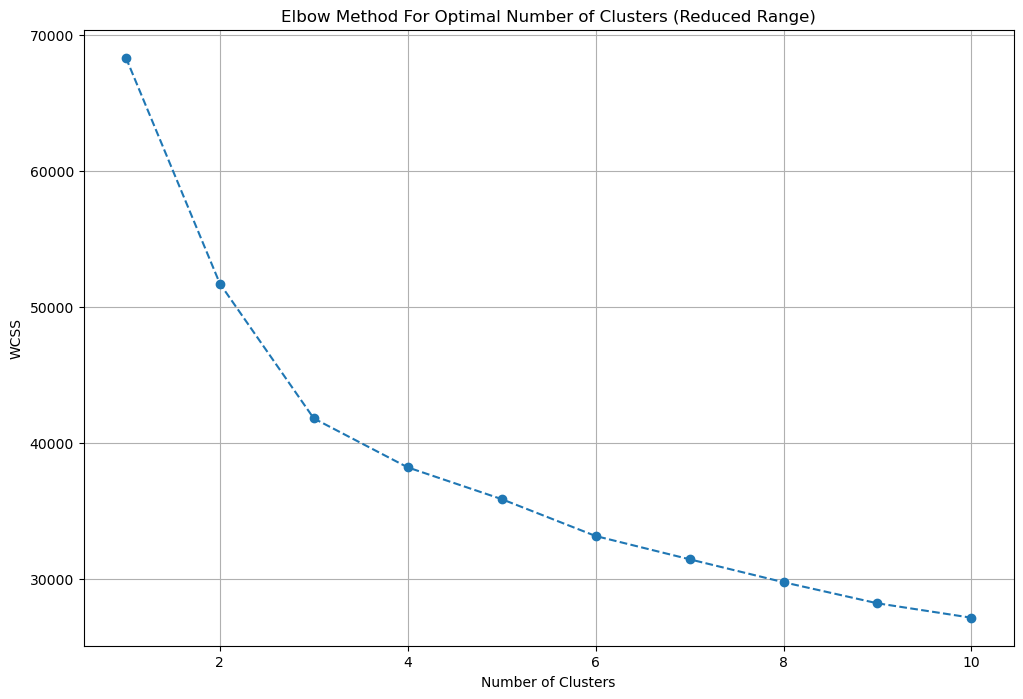

In [45]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [46]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [47]:
df = df.iloc[:,:-18]

In [48]:
df['furnishing_type'] = cluster_assignments

In [49]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1064,"['5 Wardrobe', '6 Fan', '4 Geyser', '6 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
2576,"['1 Water Purifier', '15 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '6 Geyser', '1 Stove', '10 AC', '7 TV', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '9 Wardrobe', '1 Sofa', '1 Washing Machine', '1 Microwave', 'No Bed', 'No Light']",2
1663,"['1 Fan', '1 Geyser', '1 Light', '1 Chimney', '1 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
1374,NaN,1
2254,"['1 Wardrobe', '1 Fan', '1 Geyser', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1


### 5).Features

In [50]:
df[['society','features']].sample(5)

,society,features
265,emaar palm gardens,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Water Storage', 'Park', 'Bank Attached Property', 'Visitor Parking', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2184,signature global solera,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1517,suncity platinum towers,"['Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2893,raheja revanta,"['Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Fitness Centre / GYM', 'Club house / Community Center']"
2581,parsvnath green ville,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant']"


In [51]:
df['features'].isnull().sum()

634

In [52]:
import pandas as pd
app_df = pd.read_csv("C:/Users/Damodhara/Desktop/DSMP Project/Appartments.csv")
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [53]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [54]:
temp_df = df[df['features'].isnull()]

In [55]:
temp_df.shape

(634, 26)

In [56]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [57]:
df.loc[temp_df.index,'features'] = x.values

In [58]:
df['features'].isnull().sum()

480

In [59]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [60]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [61]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
308,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1533,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
508,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [62]:
features_binary_df.shape

(3797, 130)

In [63]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

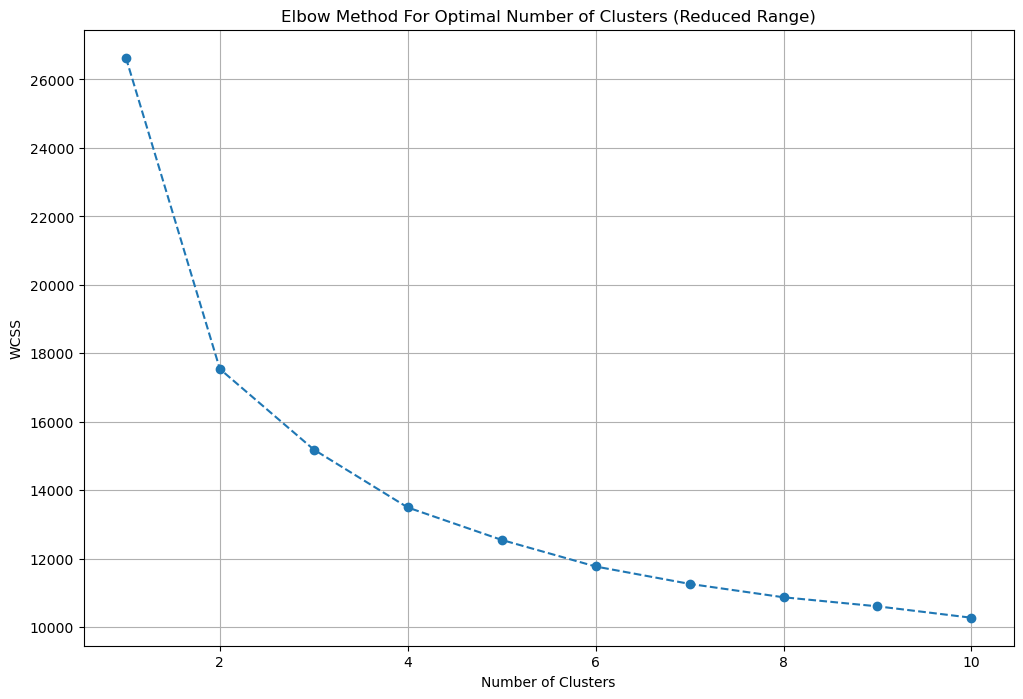

In [64]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [65]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [66]:
df['luxury_score'] = luxury_score

In [67]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,ambience creacions,sector 22,3.20,11500.0,2783.0,Super Built up area 2781(258.36 sq.m.),3,4,3+,not available,2.0,North-East,New Property,"['Moulsari Avenue', 'Ambience Mall', 'Old Delhi Gurgaon Road', 'Gurgaon - Delhi Expy', 'Rotary Public School', 'The NorthCap University', 'Manipal Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Candor Techspace', 'Hyatt Place Gurgaon Udyog Vihar', 'Fun N Food WaterPark', 'Hamoni Golf Camp', 'Tau DeviLal Sports Complex']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']",2781.0,NaN,NaN,0,0,0,0,0,1,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Park, Visitor Parking]",42
1,flat,m3m woodshire,sector 107,1.80,7623.0,2361.0,Super Built up area 2361(219.34 sq.m.)Carpet area: 1384 sq.ft. (128.58 sq.m.),3,4,3+,servant room,2.0,NaN,Relatively New,"['Signum 107', 'Nora Solomon Medicenter', 'Indira Gandhi International Airport', 'The Shikshiyan School', 'Najafgarh Jheel Bird Sanctuary', 'Skylark Cricket Academy']",[],"['Security / Fire Alarm', 'Power Back-up', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",2361.0,NaN,1384.0,0,1,0,0,0,1,"[Security / Fire Alarm, Power Back-up, Intercom Facility, Lift(s), Water purifier, Maintenance Staff, Water Storage, Separate entry for servant room, No open drainage around, Piped-gas, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Internet/wi-fi connectivity, Spacious Interiors, Low Density Society, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center]",129
2,flat,palam vihar society,sector 2,0.40,8602.0,465.0,Super Built up area 465(43.2 sq.m.)Built Up area: 450 sq.ft. (41.81 sq.m.)Carpet area: 425 sq.ft. (39.48 sq.m.),1,1,1,not available,5.0,North,Moderately Old,"['Palam Vihar Vyapar kendra', 'Palam triangle', 'HUDA Sector 23 Market', 'Ram Mandir', 'Kalyan Hospital Gurgaon', 'Metro Hospital and Heart Institute Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Chirag Hospital Pvt. Ltd', 'R K Hospital Gurgaon', 'Jiya Clinic', 'Dr. Mittal Clinic', ""Dr. Anurag's Child Care Clinic"", 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Axis bank', 'Punjab national bank', 'Big Cinemas', ""McDonald's"", 'Cafe Coffee Day', 'Moti Mahal', 'Pizza Hut', 'Pind Baluchi', ""Domino's Pizza"", 'Om Sweets', 'Chiranjiv Bharati School', 'Masti ki Pathshala Teach India', 'THE NORTHCAP UNIVERSITY', 'Swiss Cottage school', 'Palam vihar railway station']","['1 Water Purifier', '1 Fan', '1 Fridge', '1 Exhaust Fan', '1 Geyser', '1 Stove', '2 Light', '1 AC', '1 Curtains', '1 Modular Kitchen', '1 TV', '1 Chimney', '1 Bed', '1 Wardrobe', 'No Dining Table', 'No Microwave', 'No Sofa', 'No Washing Machine']","['Centrally Air Conditioned', 'Lift(s)', 'Park', 'Maintenance Staff', 'Visitor Parking', 'Security Personnel']",465.0,450.0,425.0,0,0,0,0,0,0,"[Centrally Air Conditioned, Lift(s), Park, Maintenance Staff, Visitor Parking, Security Personnel]",39
3,flat,smart world gems,sector 89,1.20,12526.0,958.0,Carpet area: 958 (89 sq.m.),3,3,3,"pooja room,store ro

In [68]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [69]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3791,flat,zara aavaas,sector 104,0.40,7029.0,569.0,Super Built up area 569(52.86 sq.m.),2,2,1,14.0,NaN,Relatively New,569.0,NaN,NaN,0,0,0,0,0,1,38
331,flat,shree vardhman flora,sector 90,0.65,4814.0,1350.0,Super Built up area 1350(125.42 sq.m.),2,2,3,10.0,North,Moderately Old,1350.0,NaN,NaN,1,0,0,0,0,0,83
3666,house,independent,sector 2,0.70,7777.0,900.0,Built Up area: 900 (83.61 sq.m.),1,1,0,1.0,NaN,Undefined,NaN,900.0,NaN,0,0,0,0,0,1,0
2753,flat,mittal surya vihar,sector 21,1.40,5833.0,2400.0,Super Built up area 2400(222.97 sq.m.),5,4,2,2.0,NaN,Moderately Old,2400.0,NaN,NaN,0,0,0,0,0,1,0
795,flat,zara aavaas,sector 104,0.20,6645.0,301.0,Built Up area: 301 (27.96 sq.m.),1,1,1,3.0,North-East,Undefined,NaN,301.0,NaN,0,0,0,0,0,1,67


In [70]:
df.shape

(3797, 23)

In [71]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)